In [1]:
# 基本模块导入
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 读取数据

In [2]:
house = pd.read_csv('../Data/House_Data.csv')
house.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


## 清理数据

In [3]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
house['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [5]:
# 删除无关的列
drop_col = ['area_type', 'society', 'availability', 'balcony']
house_ana = house.drop(drop_col, axis=1)

## 删除缺失值

In [6]:
house_ana.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
# 由于缺失值较少，并不影响整体数据，所以删除。
house_ana.dropna(inplace=True)
house_ana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
location      13246 non-null object
size          13246 non-null object
total_sqft    13246 non-null object
bath          13246 non-null float64
price         13246 non-null float64
dtypes: float64(2), object(3)
memory usage: 620.9+ KB


## 特征值处理

### location特征值处理

In [8]:
# 处理特征值 location
house_ana['location'].value_counts(ascending=False)

Whitefield                            534
Sarjapur  Road                        392
Electronic City                       302
Kanakpura Road                        266
Thanisandra                           233
                                     ... 
Kanakapura  Rod                         1
Uvce Layout                             1
Ramamohanapuram                         1
Basvasamithi Layout Vidyaranyapura      1
Pillanna Gardens                        1
Name: location, Length: 1304, dtype: int64

In [9]:
# 把location<=10的个案统一起来，用‘other’代替
location_state = house_ana['location'].value_counts(ascending=False)
location_state_less_than_10 = location_state[location_state<=10]
house_ana['location'] = house_ana['location'].apply(lambda x: \
                        'other' if x in location_state_less_than_10 else x)
house_ana['location'].value_counts()

other               2896
Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
                    ... 
Narayanapura          11
LB Shastri Nagar      11
Nehru Nagar           11
HAL 2nd Stage         11
Kodigehalli           11
Name: location, Length: 242, dtype: int64

### size特征值处理

In [10]:
# 处理特征值'size'
house_ana['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
# 根据特征值‘size’ 提取关键信息，并创建新特征值‘br_num'
house_ana['br_num'] = house_ana['size'].apply(lambda x: int(x.split(' ')[0]))
house_ana['br_num'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [12]:
house_ana['br_num'].value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
14       1
43       1
18       1
12       1
13       1
16       1
19       1
Name: br_num, dtype: int64

In [13]:
# 由于‘br_num’>10类别的个案数太少，不具有统计意义，所以删除'br_num'小于11的个案
house_ana = house_ana[house_ana['br_num']<11]
house_ana['br_num'].value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
Name: br_num, dtype: int64

In [14]:
house_ana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13234 entries, 0 to 13319
Data columns (total 6 columns):
location      13234 non-null object
size          13234 non-null object
total_sqft    13234 non-null object
bath          13234 non-null float64
price         13234 non-null float64
br_num        13234 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 723.7+ KB


### 'total_sqft'特征值处理

In [15]:
# ‘total_sqft’字段类型是字符串，其中包含‘1056’和’1133 -1384‘，我们需要转换成int。
house_ana['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
# 创建函数，把字符串转换成float。
def convert_sq_to_num(x):
    part = x.split('-')
    if len(part)==2:
        return (float(part[0])+float(part[1]))/2 # 返回均值
    try:
        float(x)
    except:
        return None
    else:
        return float(x)

In [17]:
# 使用函数
house_ana['total_sqft'] = house_ana['total_sqft'].apply(convert_sq_to_num)
house_ana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13234 entries, 0 to 13319
Data columns (total 6 columns):
location      13234 non-null object
size          13234 non-null object
total_sqft    13188 non-null float64
bath          13234 non-null float64
price         13234 non-null float64
br_num        13234 non-null int64
dtypes: float64(3), int64(1), object(2)
memory usage: 723.7+ KB


In [18]:
# 删除缺失值
house_ana.dropna(inplace=True)
house_ana.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13188 entries, 0 to 13319
Data columns (total 6 columns):
location      13188 non-null object
size          13188 non-null object
total_sqft    13188 non-null float64
bath          13188 non-null float64
price         13188 non-null float64
br_num        13188 non-null int64
dtypes: float64(3), int64(1), object(2)
memory usage: 721.2+ KB


### 'price'特征值分析，并新增'price_per_sq'

In [19]:
house_ana.head()

,location,size,total_sqft,bath,price,br_num
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


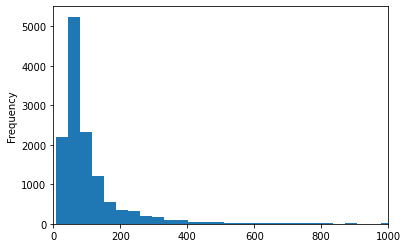

In [20]:
# 图示可见，分布图类似指数分布。
house_ana['price'].plot(kind='hist', bins=100, xlim=[0,1000])

In [21]:
# 添加特征值 price_per_sq，price的单位是100000
house_ana['price_per_sq'] = round(house_ana['price']*100000/house_ana['total_sqft'],2)
house_ana.head()

,location,size,total_sqft,bath,price,br_num,price_per_sq
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


###  添加新的特征值'sq_per_r'

In [22]:
# ‘sq_per_r'代表平均每个房间的面积
house_ana['sq_per_r'] = house_ana['total_sqft']/house_ana['br_num']

## 处理离群值

In [23]:
house_m = house_ana.copy()

### 'sq_per_r'

In [24]:
# 平均每个房间的面积不能小于300
house_m = house_m[~(house_ana['sq_per_r']<300)]
house_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12452 entries, 0 to 13319
Data columns (total 8 columns):
location        12452 non-null object
size            12452 non-null object
total_sqft      12452 non-null float64
bath            12452 non-null float64
price           12452 non-null float64
br_num          12452 non-null int64
price_per_sq    12452 non-null float64
sq_per_r        12452 non-null float64
dtypes: float64(5), int64(1), object(2)
memory usage: 875.5+ KB


### 'price_per_sq'

In [25]:
# 可以看出每个地区的房价均值差别很大
house_m.groupby('location')['price_per_sq'].mean().sort_values()

location
Chandapura                      3041.346000
Bommasandra Industrial Area     3117.506923
Kereguddadahalli                3259.150000
Ananth Nagar                    3320.336207
Kammasandra                     3489.051379
                                   ...     
2nd Stage Nagarbhavi           14381.275556
Giri Nagar                     14587.822000
Bommenahalli                   15361.577000
HAL 2nd Stage                  19134.461111
Cunningham Road                20632.478462
Name: price_per_sq, Length: 242, dtype: float64

In [26]:
# 创建函数，根据不同地点的房价，取1个标准差以内的数据。
def remove_1std(df):
    df_out = pd.DataFrame()
    for loc, group in df.groupby('location'):
        m = np.mean(group['price_per_sq'])
        std = np.std(group['price_per_sq'])
        reduce_df = group[(group['price_per_sq']<=(m+std)) & (group['price_per_sq']>=(m-std))]
        df_out = pd.concat([df_out, reduce_df], ignore_index=True)
    return df_out

In [27]:
df= remove_1std(house_m)
df.shape

(10240, 8)

In [28]:
house_m['location'].value_counts()

other                   2559
Whitefield               531
Sarjapur  Road           388
Electronic City          293
Kanakpura Road           262
                        ... 
Vishveshwarya Layout       7
5th Block Hbr Layout       7
Vishwapriya Layout         7
Thyagaraja Nagar           7
Marsur                     5
Name: location, Length: 242, dtype: int64

## 数据图形分析

In [29]:
# 创建可视化数据函数，来了解同一个地区 price 和 area 的关系
def plot_rel(df, loc, r):
    sns.relplot(data=df[(df['location']==loc) & (df['br_num'].isin(r))],\
                x='total_sqft', y='price', hue='br_num',)

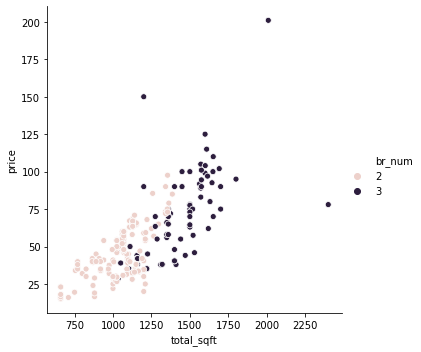

In [30]:
plot_rel(house_m, 'Electronic City', [2,3])

In [31]:
# 创建可视化数据函数， 在同一地区中，房间个数 和 单位面积均价 之间的关系
def plot_bar(df, loc, r):
    sns.barplot(data=df[(df['location']==loc) & (df['br_num'].isin(r))],\
                y='price_per_sq', x='br_num', )

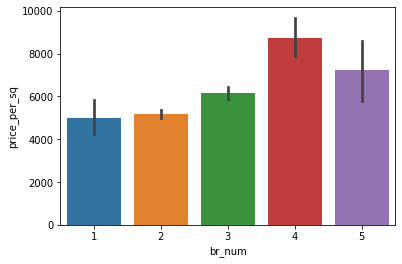

In [32]:
plot_bar(house_m, 'Sarjapur  Road', range(10))